# Logistic regression (for classification)

## plot the sigmoid function

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

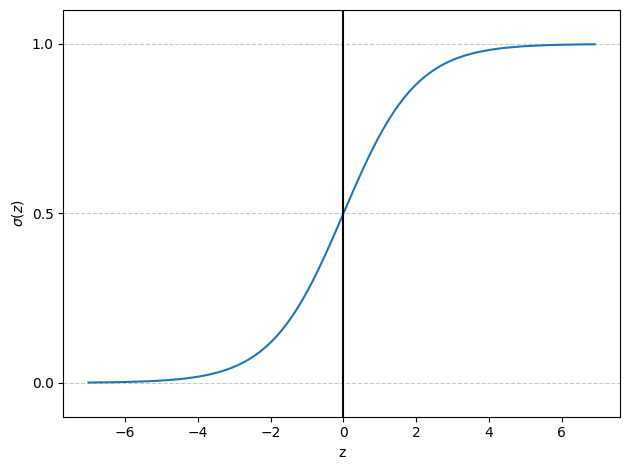

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='kb')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel(r'$\sigma (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## plot the log-likelihood or cross-entropy loss function (for a single example)

$$L = -y \log(\sigma(z)) - (1-y)\log(1-\sigma(z))$$

The 1st term becomes zero if $y=0$, and the 2nd term becomes zero if $y=1$.

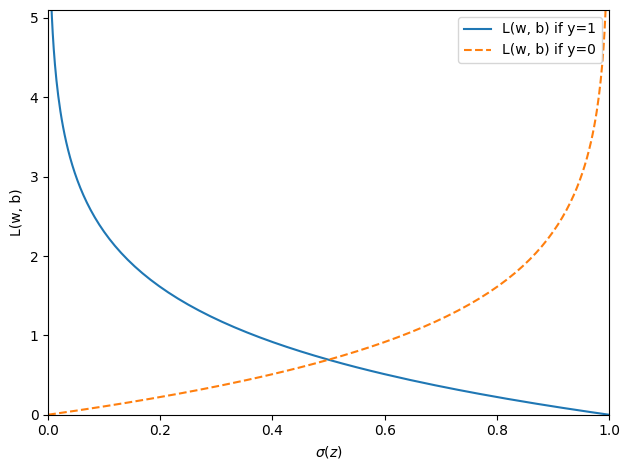

In [6]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def loss_1(z):
    return -np.log(sigmoid(z))

def loss_0(z):
    return -np.log(1-sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
c0 = [loss_0(x) for x in z]

plt.plot(sigma_z, c1, label='L(w, b) if y=1')
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])

plt.xlabel(r'$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Using the logistic regression model with cross-entroy loss function to classify the Iris dataset

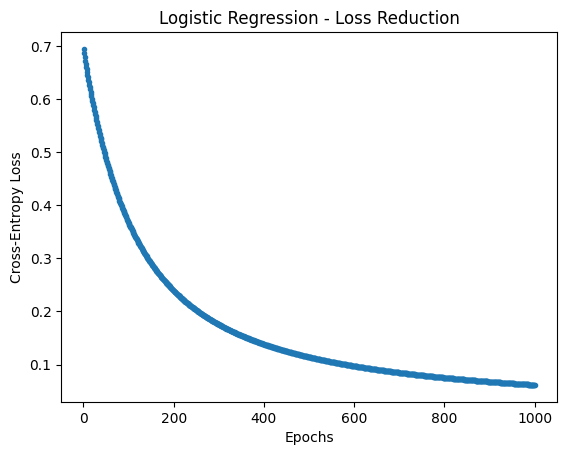

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Load dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Extract first 100 rows (binary classification)
sub_X = iris_df.iloc[0:100, [0, 2]].values  # Selecting two features
sub_y = iris_df.iloc[0:100, 4].values  # Class labels

# Convert labels to 0 and 1 for logistic regression
sub_y = np.where(sub_y == 0, 0, 1)  # 0 for setosa, 1 for versicolor

def initialize_weights(n_features, random_state=1):
    rgen = np.random.RandomState(random_state)
    weights = rgen.normal(loc=0.0, scale=0.01, size=n_features) # generate random numbers with  normal distribution (loc: mean; scale: std)
    bias = np.float64(0.)
    return weights, bias

def linear_combination(X, weights, bias):
    return np.dot(X, weights) + bias

def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # Sigmoid activation function

def compute_loss(y, probability):
    # Cross-entropy loss
    return -np.mean(y * np.log(probability) + (1 - y) * np.log(1 - probability))

def train_logistic(X, y, eta=0.01, n_iter=50, random_state=1):
    weights, bias = initialize_weights(X.shape[1], random_state)
    losses = []
    
    for _ in range(n_iter):
        weighted_sum = linear_combination(X, weights, bias)
        probability = sigmoid(weighted_sum)
        errors = y - probability
        
        # Update weights using gradient of cross-entropy loss
        # X.shape[0] the number of samples
        # X.T is the transpose of the feature matrix, its size is feature number * sample number
        # erros is vector with "sample number" elements
        # the dot product gives a vector of "feature number" elements, corresponding to the change of each weight element
        weights += eta * X.T.dot(errors) / X.shape[0]
        bias += eta * errors.mean()
        
        # Compute and store loss
        losses.append(compute_loss(y, probability))
    
    return weights, bias, losses

# Train Logistic Regression model
weights, bias, losses = train_logistic(sub_X, sub_y, eta=0.02, n_iter=1000)

# Plot the loss over epochs
plt.plot(range(1, len(losses) + 1), losses, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Logistic Regression - Loss Reduction')
plt.show()
